PETER GACHUKI'S NOTEBOOK

Importing relevant python libraries
Numpy for working with arrays
Pandas for dataset exploration and manipulation

In [248]:
import numpy as np
import pandas as pd

In [249]:
# predictive model prob (stay or not)
# demo, experience
# python code with comments
# report - methodology used, findings, perf metrics, insights, key findings
# highlight implications of model
# visualizations
# recommendations to enhance training and retention

Reading the .csv file 
.head is for displaying the first 5 rows of the dataset

In [250]:
df = pd.read_csv("aug_train.csv/aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Get the number of rows and columns (respectively)

In [251]:
df.shape

(19158, 14)

Get the column names from the dataset

In [252]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

Get the data types and non-null entries

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Check the missing values (total per column)

In [254]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Drop rows with missing values in specified columns

In [255]:
df = df.dropna(subset=['experience', 'education_level', 'enrolled_university', 'major_discipline', 'company_size', 'relevent_experience'])
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    2524
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type               650
last_new_job               167
training_hours               0
target                       0
dtype: int64

Addressing the gender column (null values). Dropping 2524 entries would do more harm than good, so we propotionally repalace the null values with Male, Female and Other

In [256]:
# Calculate the proportions of each gender
gender_counts = df['gender'].value_counts(normalize=True)
print(gender_counts)

# Identify the number of null values
num_nulls = df['gender'].isnull().sum()
print(f'Number of null values: {num_nulls}')

# Calculate the number of replacements needed for each category
num_males = int(round(num_nulls * gender_counts['Male']))
num_females = int(round(num_nulls * gender_counts['Female']))
num_others = num_nulls - num_males - num_females  # Ensure the sum matches the number of nulls

# Create a list of replacements
replacements = ['Male'] * num_males + ['Female'] * num_females + ['Other'] * num_others

# Shuffle the replacements list
np.random.shuffle(replacements)

# Replace the null values in the gender column with the shuffled replacements
df.loc[df['gender'].isnull(), 'gender'] = replacements

df.isnull().sum()

gender
Male      0.899174
Female    0.091612
Other     0.009214
Name: proportion, dtype: float64
Number of null values: 2524


enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                  0
company_size                0
company_type              650
last_new_job              167
training_hours              0
target                      0
dtype: int64

Info on numerical columns

In [257]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,11966.000000,11966.000000,11966.000000,11966.000000
mean,16664.527829,0.833647,65.681849,0.181932
std,9708.094467,0.121985,60.812049,0.385805
min,2.000000,0.448000,1.000000,0.000000
25%,8221.500000,0.754000,23.000000,0.000000
50%,16547.000000,0.910000,47.000000,0.000000
75%,25124.750000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Get the different cities and their entries

In [258]:
df["city"].value_counts()

city
city_103    2964
city_21     1785
city_16     1022
city_114     823
city_160     507
            ... 
city_111       1
city_139       1
city_79        1
city_171       1
city_180       1
Name: count, Length: 120, dtype: int64

Get the different genders and their respective counts

In [259]:
df["gender"].value_counts()

gender
Male      10760
Female     1096
Other       110
Name: count, dtype: int64

Get the different relevant experience classes and their respective counts

In [260]:
df["relevent_experience"].value_counts()

relevent_experience
Has relevent experience    10313
No relevent experience      1653
Name: count, dtype: int64

Map 'Has relevent experience' to 1 and 'No relevent experience' to 0

In [261]:
df['relevent_experience'] = df['relevent_experience'].map({'Has relevent experience': 1, 'No relevent experience': 0})
df['relevent_experience'].value_counts()

relevent_experience
1    10313
0     1653
Name: count, dtype: int64

Get enrolled_university counts

In [262]:
df["enrolled_university"].value_counts()

enrolled_university
no_enrollment       9847
Full time course    1368
Part time course     751
Name: count, dtype: int64

Get education_level counts

In [263]:
df["education_level"].value_counts()

education_level
Graduate    8298
Masters     3347
Phd          321
Name: count, dtype: int64

Get major_discipline counts

In [264]:
df["major_discipline"].value_counts()

major_discipline
STEM               10706
Humanities           469
Other                247
Business Degree      217
Arts                 180
No Major             147
Name: count, dtype: int64

Get the unique values present in the experience column

In [265]:
df["experience"].unique()

array(['15', '>20', '13', '7', '17', '5', '16', '1', '2', '11', '<1',
       '14', '18', '19', '12', '10', '6', '9', '3', '4', '8', '20'],
      dtype=object)

Replace '<1' with '0' and '>20' with '25' in the experience column - the machine cannot comprehend <1 and >1, so replace them with 0 and an arbitrary number greater than 20, say 30 for this case

In [266]:
df["experience"] = df["experience"].replace({'<1': '0', '>20': '30'})

# Convert the experience column to numeric type
df["experience"] = df["experience"].astype(int)

# display the new unique values in the column 'experience'
df["experience"].unique()


array([15, 30, 13,  7, 17,  5, 16,  1,  2, 11,  0, 14, 18, 19, 12, 10,  6,
        9,  3,  4,  8, 20])

In [267]:
df["company_size"].unique()

array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

Convert the ranges in the company_size column to integers (midpoint of the ranges)

In [268]:
df["company_size"] = df["company_size"].replace({'50-99': '75', '<10': '5', '10000+': '10000', '5000-9999': '7500', '1000-4999': '3000', '10/49': '30', '100-500': '300', '500-999': '750'})

# Convert the company_size column to numeric type
df["company_size"] = df["company_size"].astype(int)

# display the new unique values in the column 'company_size'
df["company_size"].unique()

array([   75,     5, 10000,  7500,  3000,    30,   300,   750])

Get the unique values in the company_type column

In [269]:
df["company_type"].unique()

array(['Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Public Sector', nan, 'NGO', 'Other'], dtype=object)

In [270]:
df["last_new_job"].unique()

array(['>4', '4', '1', '3', 'never', '2', nan], dtype=object)

In [271]:
df["last_new_job"] = df["last_new_job"].replace({'>4': '5', 'never': '0'})

# fill null values with -1
df["last_new_job"] = df["last_new_job"].fillna('-1')

# Convert the last_new_job column to numeric type
df["last_new_job"] = df["last_new_job"].astype(int)

# display the new unique values in the column 'last_new_job'
df["last_new_job"].unique()

array([ 5,  4,  1,  3,  0,  2, -1])

Get the unique values in the target column

In [272]:
df["target"].unique()

array([0., 1.])

In [273]:
df["target"].value_counts()

target
0.0    9789
1.0    2177
Name: count, dtype: int64

Visualization

df.describe() gives us an analysis of the numerical columns
.columns gives us a list of those numerical columns

In [274]:
df.describe().columns

Index(['enrollee_id', 'city_development_index', 'relevent_experience',
       'experience', 'company_size', 'last_new_job', 'training_hours',
       'target'],
      dtype='object')

Histogram for the numerical columns

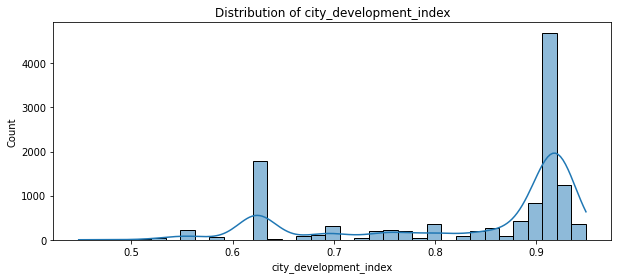

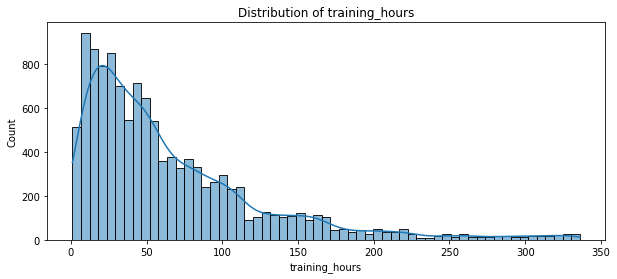

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['city_development_index', 'training_hours']

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


Bar plots for categorical columns

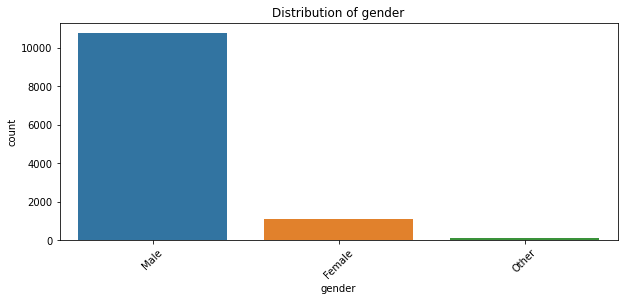

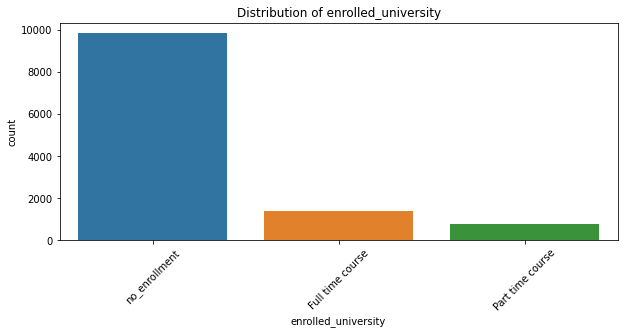

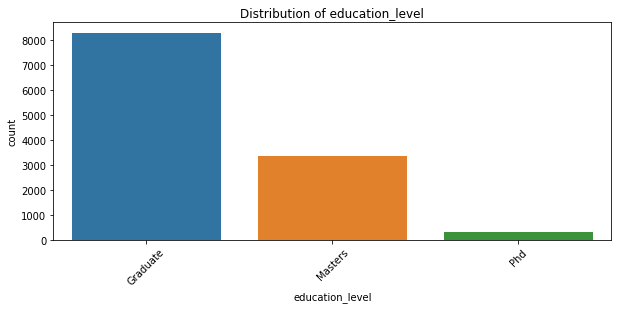

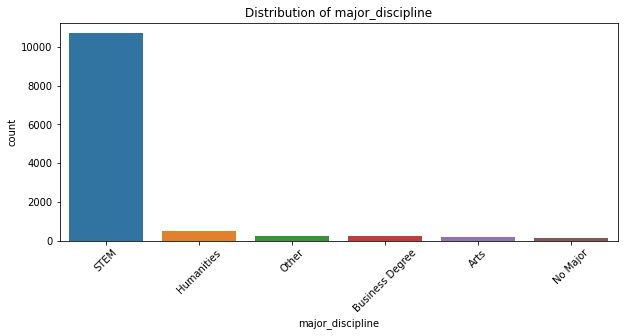

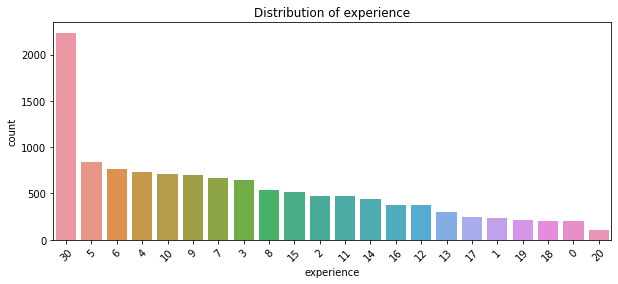

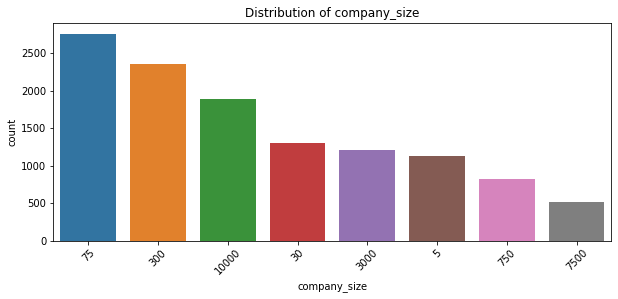

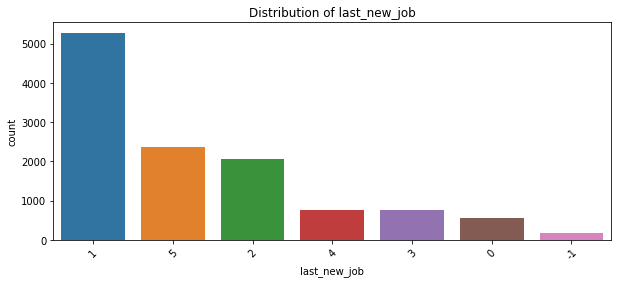

In [276]:
categorical_columns = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'last_new_job']

# loop through the categorical_columns while plotting them
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


Encode categorical data into labels the compute can understand

In [277]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# applying the label encoder to the gender column
df['gender'] = le.fit_transform(df['gender'])

df['gender'].value_counts()


gender
1    10760
0     1096
2      110
Name: count, dtype: int64

Apply LabelEncoder to other columns

In [278]:
for col in ['city', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']:
    df[col] = le.fit_transform(df[col])

Heatmap to show how the variables relate with each other

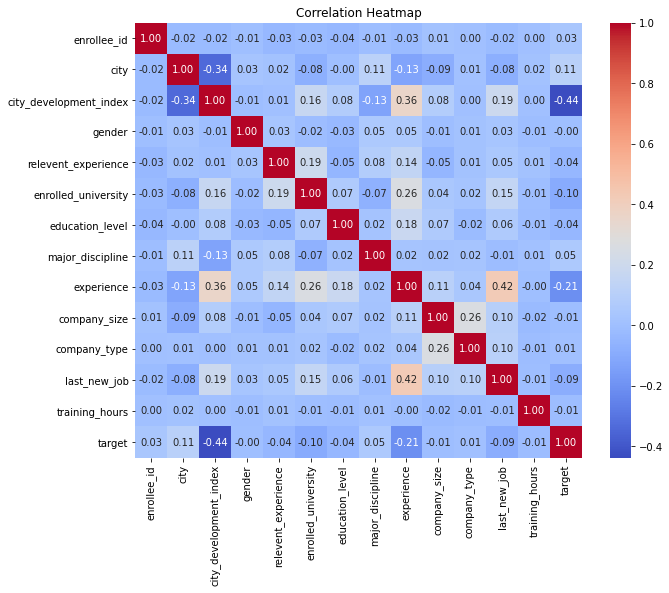

In [279]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Distribution of target variable

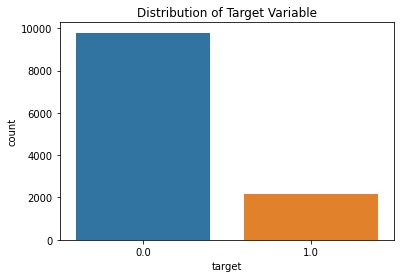

In [280]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target')
plt.title('Distribution of Target Variable')
plt.show()


Relationship between the target variable and other features

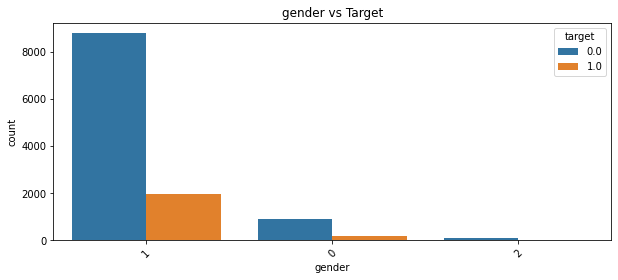

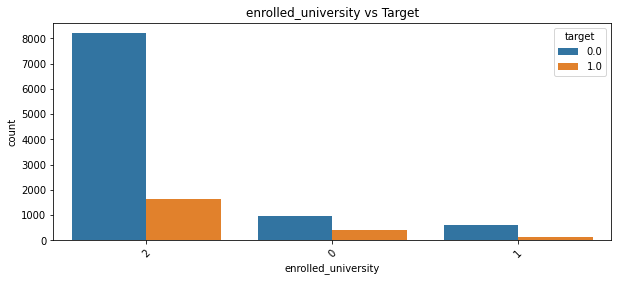

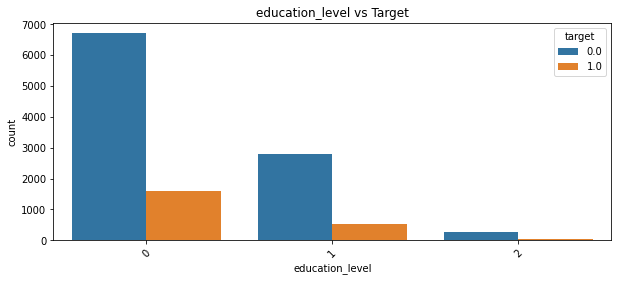

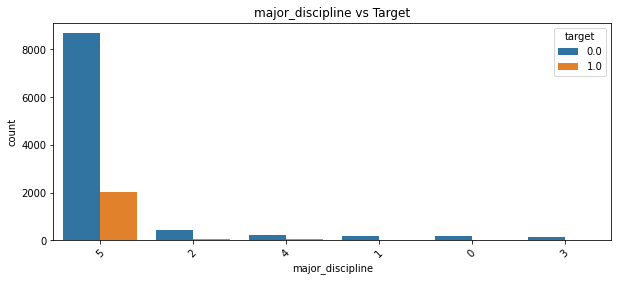

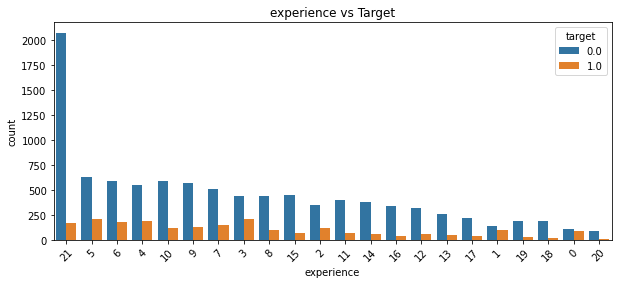

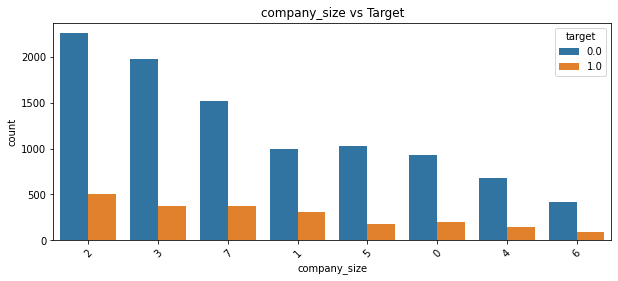

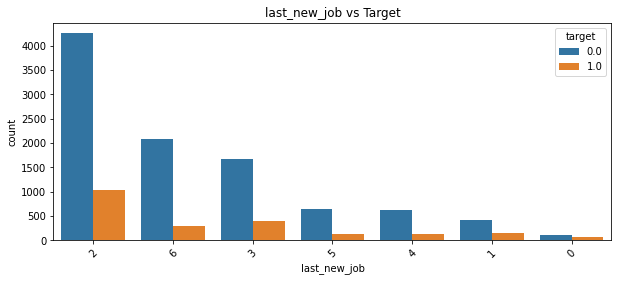

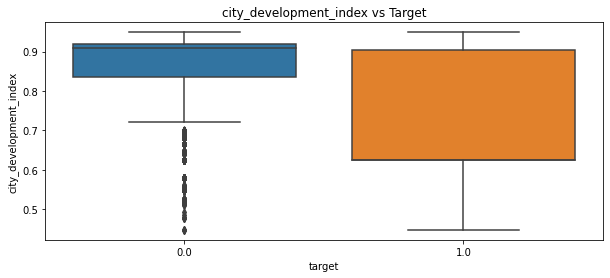

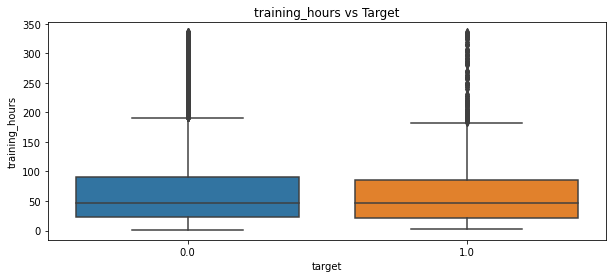

In [281]:
# Relationship between target and categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue='target', order=df[col].value_counts().index)
    plt.title(f'{col} vs Target')
    plt.xticks(rotation=45)
    plt.show()

# Relationship between target and numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x='target', y=col)
    plt.title(f'{col} vs Target')
    plt.show()


Splitting the dataset into train and test set

In [282]:
from sklearn.model_selection import train_test_split

# Define features and target from the preprocessed data
X = df.drop(columns=['target'])
y = df['target']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking out the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9572, 13), (2394, 13), (9572,), (2394,))

Scaling the data

In [283]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Training the model using Logistic Regression

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1971
         1.0       0.59      0.39      0.47       423

    accuracy                           0.84      2394
   macro avg       0.73      0.67      0.69      2394
weighted avg       0.83      0.84      0.83      2394

[[1855  116]
 [ 258  165]]


Training the model using decision trees

In [285]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier:
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      1971
         1.0       0.35      0.38      0.37       423

    accuracy                           0.77      2394
   macro avg       0.61      0.62      0.61      2394
weighted avg       0.77      0.77      0.77      2394

[[1672  299]
 [ 261  162]]


training the model using gradient boosting classifier

In [286]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier:
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      1971
         1.0       0.60      0.48      0.54       423

    accuracy                           0.85      2394
   macro avg       0.75      0.71      0.72      2394
weighted avg       0.84      0.85      0.85      2394

[[1833  138]
 [ 218  205]]


Saving the model

In [287]:
import pickle

# Save the model to a file
with open('gradient_boosting.pkl', 'wb') as file:
    pickle.dump(model, file)


Training the model using support vector classifier

In [288]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


Support Vector Machine:
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      1971
         1.0       0.57      0.45      0.50       423

    accuracy                           0.84      2394
   macro avg       0.73      0.69      0.70      2394
weighted avg       0.83      0.84      0.84      2394

[[1828  143]
 [ 233  190]]


Saving the model

In [289]:
import pickle

# Save the model to a file
with open('svc.pkl', 'wb') as file:
    pickle.dump(model, file)

Training and evaluating KNN

In [290]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      1971
         1.0       0.51      0.36      0.42       423

    accuracy                           0.82      2394
   macro avg       0.69      0.64      0.66      2394
weighted avg       0.81      0.82      0.81      2394

[[1824  147]
 [ 272  151]]


Training and evaluating Naive Bayes Classifier

In [291]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Classifier:
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      1971
         1.0       0.47      0.58      0.52       423

    accuracy                           0.81      2394
   macro avg       0.69      0.72      0.70      2394
weighted avg       0.83      0.81      0.82      2394

[[1690  281]
 [ 178  245]]
